In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
#Create empty dataframe for cities
city_df = pd.DataFrame({
    'City':cities
                       })

city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""

city_df.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,,,,,,,,
1,clyde,,,,,,,,
2,attawapiskat,,,,,,,,
3,kruisfontein,,,,,,,,
4,pangnirtung,,,,,,,,


## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call

for index,row in city_df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(url).json()
    count = 0
   
    city = row['City']
    print("Processing City Record #%s: %s" % (index + 1, city_df.loc[index,"City"]))
    print(url)

    try:
        city_df.loc[index,'Cloudiness']=response['clouds']['all']
        city_df.loc[index,'Country']=response['sys']['country']
        city_df.loc[index,'Date']=response['dt']
        city_df.loc[index,'Humidity']=response['main']['humidity']
        city_df.loc[index,'Lat']=response['coord']['lat']
        city_df.loc[index,'Lng']=response['coord']['lon']
        city_df.loc[index,'Max Temp']=response['main']['temp_max']
        city_df.loc[index,'Wind Speed']=response['wind']['speed']
    except(KeyError):
        
        print("Skip")
        count += 1
        if len(cities) - count < 500:
            break

            
                        


Processing City Record #1: busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=bethel
Processing City Record #2: clyde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=busselton
Processing City Record #3: attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=clyde
Processing City Record #4: kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=attawapiskat
Skip
Processing City Record #5: pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=kruisfontein
Processing City Record #6: namtsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=pangnirtung
Processing City Record #7: mandera
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing City Record #56: poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=alofi
Processing City Record #57: jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=poya
Processing City Record #58: nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=jalu
Processing City Record #59: bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=nikolskoye
Processing City Record #60: hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=bandarbeyla
Processing City Record #61: punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=hilo
Processing City Record #62: nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a

Processing City Record #110: sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=vaitape
Processing City Record #111: puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=sioux lookout
Processing City Record #112: bartlesville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=puerto leguizamo
Processing City Record #113: hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=bartlesville
Processing City Record #114: potosi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=hasaki
Processing City Record #115: mastic beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=potosi
Processing City Record #116: tumannyy
http://api.openweathermap.org/dat

Processing City Record #164: ukrayinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=petropavlovsk-kamchatskiy
Processing City Record #165: vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=ukrayinka
Processing City Record #166: nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=vestmannaeyjar
Processing City Record #167: yakovlevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=nalut
Processing City Record #168: longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=yakovlevka
Processing City Record #169: bull savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=longyearbyen
Processing City Record #170: hithadhoo
http://api.openweath

Processing City Record #219: yashkino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=lamar
Processing City Record #220: dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=yashkino
Processing City Record #221: paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=dikson
Processing City Record #222: batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=paita
Processing City Record #223: areosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=batagay
Processing City Record #224: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=areosa
Processing City Record #225: labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a

Processing City Record #275: constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=torit
Skip
Processing City Record #276: port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=constitucion
Processing City Record #277: riviera beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=port blair
Processing City Record #278: provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=riviera beach
Processing City Record #279: bakel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=provideniya
Processing City Record #280: pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=bakel
Processing City Record #281: nanfeng
http://api.openweathermap.org/data/2.5/wea

Processing City Record #331: beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=manhattan
Processing City Record #332: cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=beringovskiy
Processing City Record #333: martinsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=cabedelo
Processing City Record #334: watsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=martinsville
Processing City Record #335: umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=watsa
Processing City Record #336: broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=umzimvubu
Skip
Processing City Record #337: nileshwar
http://api.openweathermap.org/data/2.5/weathe

Processing City Record #386: teluk nibung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=emilio carranza
Processing City Record #387: pita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=teluk nibung
Skip
Processing City Record #388: trujillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=pita
Processing City Record #389: isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=trujillo
Processing City Record #390: kuhestan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=isangel
Processing City Record #391: den chai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=kuhestan
Skip
Processing City Record #392: youghal
http://api.openweathermap.org/data/2.5/weather?u

Processing City Record #441: alexandria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=rehoboth
Processing City Record #442: lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=alexandria
Processing City Record #443: thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=lolua
Skip
Processing City Record #444: deh rawud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=thinadhoo
Processing City Record #445: kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=deh rawud
Skip
Processing City Record #446: jizan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=kaeo
Processing City Record #447: morris
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=vanimo
Processing City Record #496: nahariyya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=rasinari
Processing City Record #497: port keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=nahariyya
Processing City Record #498: sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=port keats
Processing City Record #499: gari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=sibolga
Processing City Record #500: ohara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=gari
Processing City Record #501: tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=ohara


Processing City Record #550: cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=quelimane
Processing City Record #551: poli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=cairns
Processing City Record #552: adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=poli
Processing City Record #553: hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=adrar
Processing City Record #554: batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=hami
Processing City Record #555: auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6a4a0893cf53aa&q=batemans bay
Processing City Record #556: bara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a024937066a2357d4f6

In [5]:
#Display the City Data Frame after dropping the empty rows
city_df['Cloudiness'].replace('', np.nan, inplace=True)
city_completed_df = city_df.dropna().reset_index(drop=True)
city_completed_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,75.0,US,1538351580,54,60.79,-161.76,66.02,6.93
1,clyde,0.0,AU,1538352816,100,-33.64,115.35,57.45,17.38
2,attawapiskat,24.0,NZ,1538353062,73,-45.19,169.32,51.15,1.39
3,pangnirtung,0.0,ZA,1538353062,76,-34,24.73,64.92,17.27
4,namtsy,88.0,CA,1538352889,100,66.15,-65.72,31.62,20.29


# Latitude vs Temperature Plot

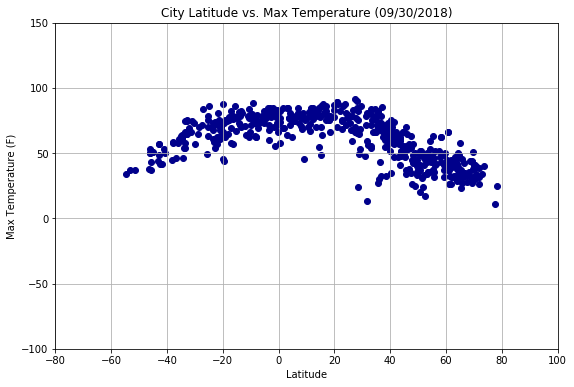

In [6]:
#Plot the graph and define date of analysis
date_of_analysis = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(9,6))
plt.scatter(city_completed_df['Lat'], city_completed_df['Max Temp'],marker="o", color = 'DarkBlue') 
plt.title(f"City Latitude vs. Max Temperature ({date_of_analysis})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-100, 150)
plt.xlim(-80, 100)



#Save the figure
plt.savefig("HW6_figure1.png")


# Latitude vs. Humidity Plot 

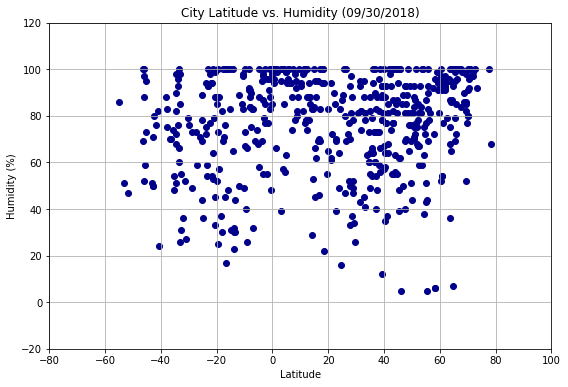

In [7]:
#Scatterplot
plt.figure(figsize=(9,6))
plt.scatter(city_completed_df['Lat'], city_completed_df['Humidity'],marker="o", color = "DarkBlue") 
plt.title(f"City Latitude vs. Humidity ({date_of_analysis})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-20, 120)
plt.xlim(-80, 100)



#Save the figure
plt.savefig("HW6_figure2.png")


# Latitude vs. Cloudiness Plot 

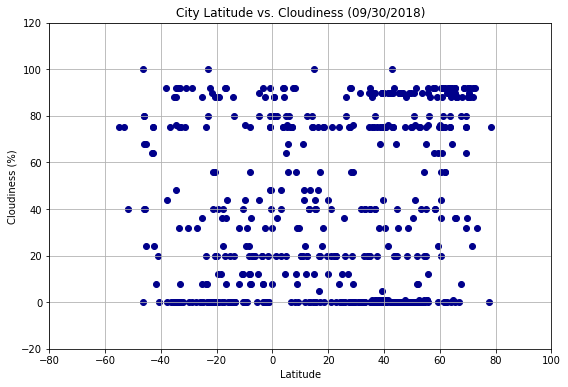

In [8]:
#Scatterplot
plt.figure(figsize=(9,6))
plt.scatter(city_completed_df['Lat'], city_completed_df['Cloudiness'],marker="o", color = "DarkBlue") 
plt.title(f"City Latitude vs. Cloudiness ({date_of_analysis})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-20, 120)
plt.xlim(-80, 100)



#Save the figure
plt.savefig("HW6_figure3.png")


# Latitude vs. Wind Speed Plot

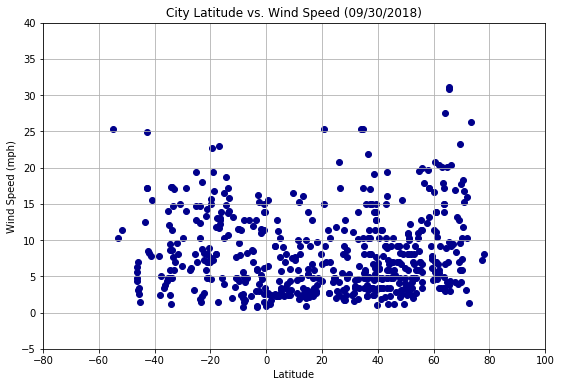

In [9]:
#Scatterplot
plt.figure(figsize=(9,6))
Scatterplot = plt.scatter(city_completed_df['Lat'], city_completed_df['Wind Speed'],marker="o", color = "DarkBlue") 
plt.title(f"City Latitude vs. Wind Speed ({date_of_analysis})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-5, 40)
plt.xlim(-80, 100)




#Save the figure
plt.savefig("HW6_figure4.png")


In [10]:
#export as csv file
city_completed_df.to_csv("City_Weather.csv")